<a href="https://colab.research.google.com/github/Deemofly/FallDetection/blob/main/%E2%80%9Cimage_classification_with_fastai_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 重启
!kill -9 -1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#! pip install fastai

In [ ]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
bs = 32

In [ ]:
path = Path("/content/drive/MyDrive/Notebooks/imgs")
path.ls()

[PosixPath('/content/drive/MyDrive/Notebooks/imgs/train')]

In [ ]:
path_img = path/'train'
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/content/drive/MyDrive/Notebooks/imgs/train/standing_689.png'),
 PosixPath('/content/drive/MyDrive/Notebooks/imgs/train/standing_694.png'),
 PosixPath('/content/drive/MyDrive/Notebooks/imgs/train/standing_680.png'),
 PosixPath('/content/drive/MyDrive/Notebooks/imgs/train/standing_681.png'),
 PosixPath('/content/drive/MyDrive/Notebooks/imgs/train/standing_693.png')]

In [ ]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.png$'

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  return _solve_func(B,A)[0][:,0]


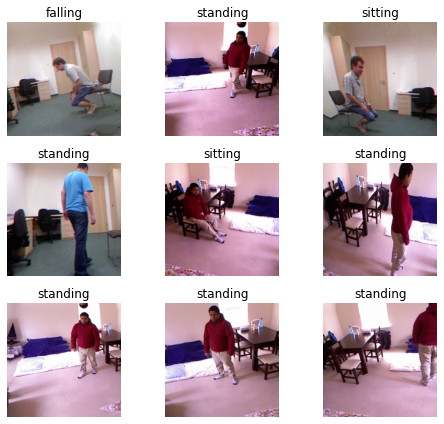

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
print(data.classes)
len(data.classes),data.c

['falling', 'lying', 'sitting', 'standing']


(4, 4)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.699111,0.146111,0.050000,00:52
1,0.330561,0.070115,0.020690,00:52
2,0.198908,0.077554,0.032759,00:52
3,0.157300,0.042068,0.018966,00:51
4,0.131262,0.030834,0.012069,00:51


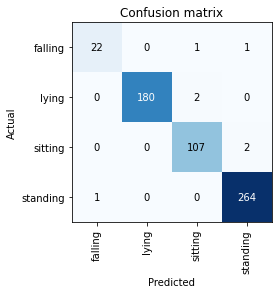

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
# learn.save('stage-1')

In [ ]:
# learn.export('/content/drive/MyDrive/Notebooks/models/model_resnet34_V1.pkl')
saved_learn=load_learner('/content/drive/MyDrive/Notebooks/models',file='model_resnet34_V1.pkl')


In [ ]:
img = open_image('/content/drive/MyDrive/Notebooks/imgs/valid/rgb_0550.png')
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

Category tensor(4)

(Category tensor(1), tensor(1), tensor([0.1598, 0.4079, 0.3467, 0.0856]))

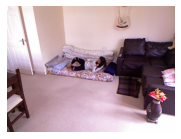

In [ ]:
test_your_image='/content/drive/MyDrive/Notebooks/imgs2/test/rgb_0610.png'

test = open_image(test_your_image)

test.show()

# learn.predict(test)
saved_learn.predict(test)